In [1]:
import os
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
tf.__version__

'2.11.0'

In [3]:
big5 = pd.read_csv('./big5_scored.csv')

In [4]:
big5.head(5)

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O6,O7,O8,O9,O10,E_SC,N_SC,A_SC,C_SC,O_SC
0,4,4,5,4,5,5,4,3,5,5,...,5,4,2,5,5,44,49,46,47,43
1,2,4,3,3,3,3,1,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,5,5,1,2,5,5,1,1,5,5,...,5,5,5,5,5,35,14,38,49,45
3,2,1,2,2,3,2,3,2,4,1,...,4,5,2,5,5,22,17,37,26,41
4,3,5,3,3,3,5,3,5,3,1,...,5,3,1,5,3,34,30,44,34,34


In [5]:
E_df = big5.loc[:, "E1":"E10"]
E_df.loc[:,"score"] = big5.loc[:,"E_SC"]

c:\users\user\anaconda3\envs\mldl\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\user\anaconda3\envs\mldl\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [6]:
categorys = []
for val in E_df['score']:
    if val < 30:
        category = 0
    else:
        category = 1
    categorys.append(category)
    
E_df['C'] = categorys

c:\users\user\anaconda3\envs\mldl\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [7]:
E_df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,score,C
0,4,4,5,4,5,5,4,3,5,5,44,1
1,2,4,3,3,3,3,1,1,1,1,22,0
2,5,5,1,2,5,5,1,1,5,5,35,1
3,2,1,2,2,3,2,3,2,4,1,22,0
4,3,5,3,3,3,5,3,5,3,1,34,1


In [8]:
n_features = E_df.loc[:, "E1":"E10"]
target = E_df.pop('C')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(n_features, target, shuffle = False, train_size=0.8)
X_test = x_test.reset_index(drop=True)

In [10]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(x_train)

In [11]:
normalizer(x_train.iloc[:3])

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[ 1.1177529 ,  0.5850355 ,  1.286567  ,  0.95662224,  1.2241367 ,
         1.1735576 ,  0.7969921 ,  0.288679  ,  1.3574251 ,  1.9850346 ],
       [-0.5061705 ,  0.5850355 , -0.32540873,  0.13651943, -0.32973522,
        -0.43395394, -1.2980866 , -1.2873504 , -1.5037984 , -1.0775287 ],
       [ 1.9297147 ,  1.3448085 , -1.9373845 , -0.6835834 ,  1.2241367 ,
         1.1735576 , -1.2980866 , -1.2873504 ,  1.3574251 ,  1.9850346 ]],
      dtype=float32)>

In [12]:
# Hyperparameters

batch_size = 32
epoch = 50

In [14]:
def get_baslc_model(normalizer = None, n1=2, n2=2):
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(n1, activation = 'relu'),
        tf.keras.layers.Dense(n2, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer= 'SGD',
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model

In [15]:
model = get_baslc_model(normalizer=normalizer, n1 = 20, n2 = 20)
model.fit(x_train, y_train,
          epochs = epoch, batch_size = batch_size)

Epoch 1/50
493/493 [==============================] - 1s 977us/step - loss: 0.3510 - accuracy: 0.8953
Epoch 2/50
493/493 [==============================] - 0s 985us/step - loss: 0.1241 - accuracy: 0.9706
Epoch 3/50
493/493 [==============================] - 0s 943us/step - loss: 0.0755 - accuracy: 0.9838
Epoch 4/50
493/493 [==============================] - 0s 973us/step - loss: 0.0545 - accuracy: 0.9899
Epoch 5/50
493/493 [==============================] - 0s 922us/step - loss: 0.0422 - accuracy: 0.9944
Epoch 6/50
493/493 [==============================] - 0s 947us/step - loss: 0.0342 - accuracy: 0.9964
Epoch 7/50
493/493 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9976
Epoch 8/50
493/493 [==============================] - 0s 922us/step - loss: 0.0243 - accuracy: 0.9982
Epoch 9/50
493/493 [==============================] - 0s 941us/step - loss: 0.0210 - accuracy: 0.9986
Epoch 10/50
493/493 [==============================] - 0s 961us/step - loss: 0.0184 

In [16]:
y_pred = model.predict(X_test, batch_size= 1)

3944/3944 [==============================] - 3s 744us/step


In [17]:
y_pred_c = []
for i in y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    y_pred_c.append(val)

In [18]:
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != y_pred_c).sum()) / len(y_test)))

총 테스트 개수 : 3944, 오류개수 : 0
정확도 : 1.00


In [19]:
test_accuracy = (len(y_test) - (y_test != y_pred_c).sum()) / len(y_test)

In [20]:
X_test

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,5,5,5,5,4,5,5,5,5,4
1,2,3,4,1,4,3,3,1,1,2
2,1,4,3,4,3,3,2,3,3,1
3,4,5,4,3,4,4,5,4,5,4
4,2,1,3,3,2,2,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...
3939,1,2,3,1,4,3,1,4,1,1
3940,2,3,2,3,2,3,2,2,4,2
3941,2,1,4,1,5,1,1,4,1,1
3942,1,2,2,3,2,2,1,3,4,1


In [21]:
shuffled_scores = {}

for feature in X_test.columns:
    copy = X_test.copy()
    random.shuffle(copy.loc[:, feature])
#     print(copy)
    shuffled_pred = model.predict(copy, batch_size = 1)
    
    shuffled_pred_c = []
    for i in shuffled_pred:
        if i < 0.5:
            val = 0
        else:
            val = 1
        shuffled_pred_c.append(val)
    
    shuffled_score = (len(y_test) - (y_test != shuffled_pred_c).sum()) / len(y_test)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

3944/3944 [==============================] - 3s 731us/step
{'E1': 0.9495436105476673, 'E2': 0.9459939148073022, 'E3': 0.9515720081135902, 'E4': 0.9495436105476673, 'E5': 0.9482758620689655, 'E6': 0.9553752535496958, 'E7': 0.9454868154158215, 'E8': 0.9543610547667343, 'E9': 0.9399087221095335, 'E10': 0.9510649087221096}


In [22]:
print("Original Classfication Accuracy : %.4f"%(test_accuracy))
for n in range(len(X_test.columns)):
    print("%s high importance shuffled Accuracy : %s %.4f" %(n+1, sorted(shuffled_scores.items(), key=lambda item : item[1])[n][0], sorted(shuffled_scores.items(), key=lambda item : item[1])[n][1]))

Original Classfication Accuracy : 1.0000
1 high importance shuffled Accuracy : E9 0.9399
2 high importance shuffled Accuracy : E7 0.9455
3 high importance shuffled Accuracy : E2 0.9460
4 high importance shuffled Accuracy : E5 0.9483
5 high importance shuffled Accuracy : E1 0.9495
6 high importance shuffled Accuracy : E4 0.9495
7 high importance shuffled Accuracy : E10 0.9511
8 high importance shuffled Accuracy : E3 0.9516
9 high importance shuffled Accuracy : E8 0.9544
10 high importance shuffled Accuracy : E6 0.9554


In [23]:
E2_x_train = x_train.loc[:, ["E9", "E7"]]
E2_x_test = x_test.loc[:, ["E9", "E7"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E2_x_train)

new_model = get_baslc_model(normalizer=new_normalizer, n1 = 2, n2 = 2)
hist = new_model.fit(E2_x_train, y_train, epochs = 100, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E2_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

3944/3944 [==============================] - 3s 738us/step
총 테스트 개수 : 3944, 오류개수 : 637
정확도 : 0.84


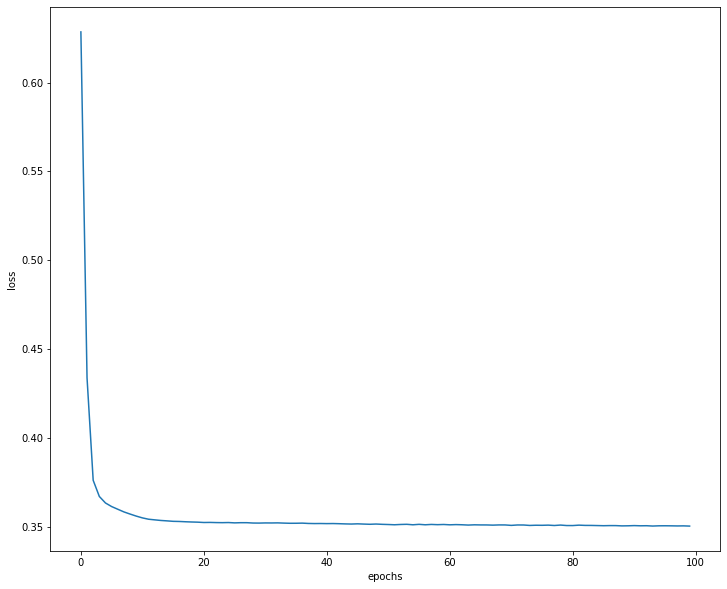

In [24]:
plt.figure(figsize = (12, 10))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

3944/3944 [==============================] - 3s 675us/step
총 테스트 개수 : 3944, 오류개수 : 441
정확도 : 0.89


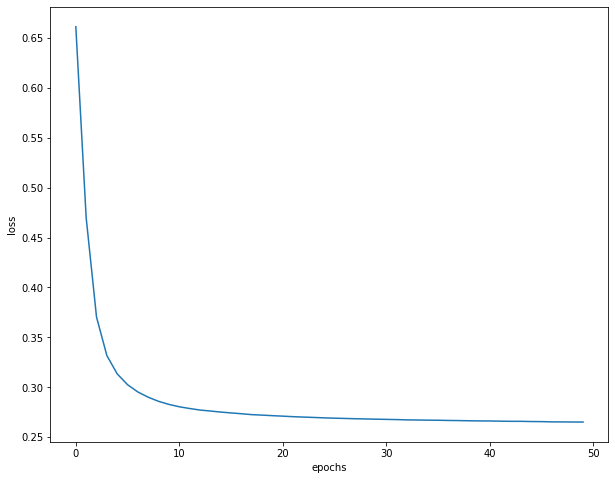

In [25]:
E3_x_train = x_train.loc[:, ["E9", "E7","E2"]]
E3_x_test = x_test.loc[:, ["E9", "E7", "E2"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E3_x_train)

new_model = get_baslc_model(normalizer=new_normalizer, n1 = 2, n2 = 2)
hist = new_model.fit(E3_x_train, y_train, epochs = 50, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E3_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

plt.figure(figsize = (10, 8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

3944/3944 [==============================] - 3s 725us/step
총 테스트 개수 : 3944, 오류개수 : 356
정확도 : 0.91


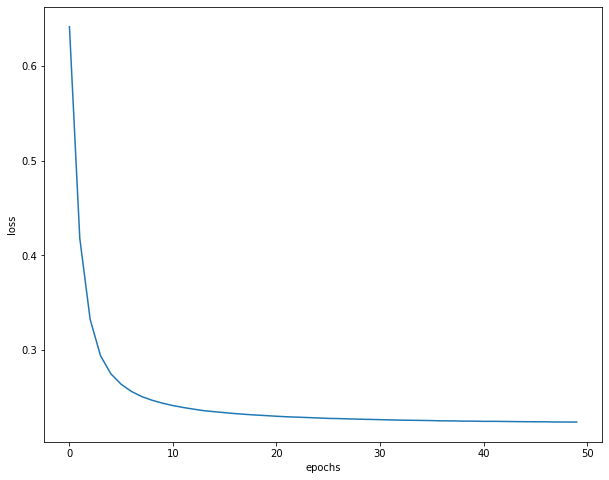

In [27]:
E4_x_train = x_train.loc[:, ["E9", "E7", "E2", "E5"]]
E4_x_test = x_test.loc[:, ["E9", "E7", "E2", "E5"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E4_x_train)

new_model = get_baslc_model(normalizer=new_normalizer)
hist = new_model.fit(E4_x_train, y_train, epochs = 50, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E4_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

plt.figure(figsize = (10, 8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

3944/3944 [==============================] - 3s 752us/step
총 테스트 개수 : 3944, 오류개수 : 324
정확도 : 0.92


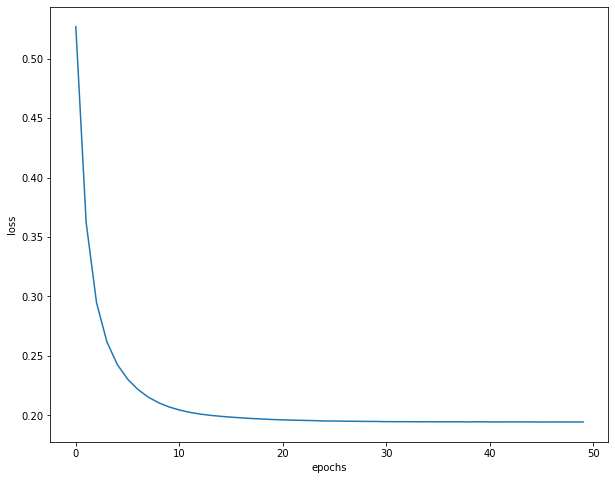

In [28]:
E5_x_train = x_train.loc[:, ["E9", "E7", "E2", "E5", "E1"]]
E5_x_test = x_test.loc[:, ["E9", "E7", "E2", "E5", "E1"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E5_x_train)

new_model = get_baslc_model(normalizer=new_normalizer)
hist = new_model.fit(E5_x_train, y_train, epochs = 50, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E5_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

plt.figure(figsize = (10, 8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()